In [ ]:
%matplotlib inline

from pathlib import Path
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample

import seaborn as sns
import matplotlib.pylab as plt

In [ ]:
# LOANS_INCOME_CSV = DATA / '/content/drive/MyDrive/Colab Notebooks/PS/data/loans_income.csv'
# SP500_DATA_CSV = DATA / '/content/drive/MyDrive/Colab Notebooks/PS/data/sp500_data.csv.gz'

## 2.3 표본분포
여기서는 표본 이라고 하고 있지만, 정확히는
표본의 분포, 5개만 뽑아서 평균을 낸 평균의 분포, 20개를 뽑아서 평균을 낸 평균의 분포이다.

많이 헷갈리는 부분이다. 그 표본이 정규분포를 따르는 것이 아니라 그 표본의 평균의 분포가 중심극한정리에 의해서 정규분포를 따른다.

그래서 이는 우리가 정규 분포에 근사한 분포들을 정규분포에 근사해서 사용할 수 있게 만들어 준다.

<br>
암튼 데이터 과학에서는 부트스트랩을 사용할 수 있기 때문에 그렇게 중요하지는 않다.

In [ ]:
loans_income = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PS/data/loans_income.csv').squeeze('columns')

sample_data = pd.DataFrame({
    'income': loans_income.sample(1000),
    'type': 'Data',
})

sample_mean_05 = pd.DataFrame({
    'income': [loans_income.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5',
})

sample_mean_20 = pd.DataFrame({
    'income': [loans_income.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20',
})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
print(results.head())

         income  type
25485  131000.0  Data
40213  125000.0  Data
14269   80000.0  Data
15249   43000.0  Data
17461   74000.0  Data


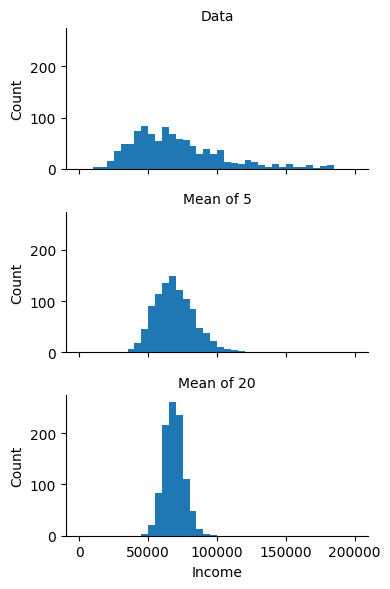

In [ ]:
g = sns.FacetGrid(results, col='type', col_wrap=1,
                  height=2, aspect=2)
g.map(plt.hist, 'income', range=[0, 200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

plt.tight_layout()
plt.show()


위를 그래프를 간단하게 보면 쉽게 이해할 수 있다.

## 2.4 브트스트랩
표본에서 추가적으로 표본을 복원 추출하고 각 표본에 대한 통계량과 모델을 다시 계산하는 것을 부트스트랩이라고 한다.

1. 샘플값을 하나 뽑아서 기록하고 다시 제자리에 놓는다
2. n번 반복한다
3. 재표본된 값의 평균을 기록한다.
4. 1 ~ 3단계를 R번 반복한다
5. R개의 결과를 이용하여
    a. 표준편차를 계산한다
    b. 히스토그램 또는 상자그림을 그린다
    c. 신뢰구간을 찾는다.



In [ ]:
results = []
for nrepeat in range(1000):
    sample = resample(loans_income)
    results.append(sample.median())
results = pd.Series(results)

print('Bootstrap Statistics:')
print(f'original: {loans_income.median()}')
print(f'bias: {results.mean() - loans_income.median()}')
print(f'std. error: {results.std()}')

Bootstrap Statistics:
original: 62000.0
bias: -81.29450000000361
std. error: 227.6232520297841


## 결과 해석
1000번을 부트스트랩을 실행했습니다.
실행한걸 보면 그냥 loan_income에서 resample 그니까 복원 추출을 시행했습니다.

그리고 1000번 부트스트랩을 실행해서 얻은 표본들의 원 데이터의 median과 비교합니다
<br>
이걸 원래 데이터와 비교하는 이유는 부트스트랩을 실행해서 뽑은 표본들은 원래 데이터와 비슷한 분포를 가질 것이라고 기대하기 때문입니다.
<br><br>
Bootstrap:
부트스트랩은 통계학에서 원래 데이터셋으로부터 여러 번 랜덤하게 샘플을 추출하여 복원하는 방법을 의미합니다. <br>
<strong>이렇게 추출된 샘플들은 원래의 데이터셋과 비슷한 분포를 가질 것이라고 기대합니다.</strong><br><br>
"배깅"이라는 용어는 "Bootstrap Aggregating"의 줄임말로부터 유래되었습니다. 배깅의 두 주요 구성 요소를 살펴보면 이 이름의 유래를 이해할 수 있습니다:

1. Bootstrap:
부트스트랩은 통계학에서 원래 데이터셋으로부터 여러 번 랜덤하게 샘플을 추출하여 복원하는 방법을 의미합니다. 이렇게 추출된 샘플들은 원래의 데이터셋과 비슷한 분포를 가질 것이라고 기대합니다.
배깅에서는 이 부트스트랩 샘플링 방법을 사용하여 여러 개의 서브셋 데이터를 생성합니다.
2. Aggregating:
여러 개의 모델이 각각의 부트스트랩 샘플에서 학습된 후, 그 예측들을 집계(aggregating)하여 최종 예측을 만듭니다.
회귀 문제의 경우, 모델들의 예측값의 평균을 취할 수 있으며, 분류 문제의 경우에는 투표 방식을 사용하여 가장 많이 예측된 클래스를 선택할 수 있습니다.
<br><br>
따라서 "배깅"이라는 용어는 이러한 두 가지 주요 단계, 즉 "부트스트랩"과 "집계"를 결합한 것입니다. 이 두 가지 단계를 통해 배깅은 모델의 분산을 줄이고 과적합을 방지하여 전체적인 성능을 향상시키는 효과를 가집니다.



## 2.4.1 재표본추출 대 부트스트래핑
비복원 추출 vs 복원 추출
근데 내가 알기로는 브트스트래핑 많이 쓴다. 허허
재표본추출이 한계가 있는 걸로 알고 있음.

## 2.5 신뢰구간
이 것도 헷갈리 수 있는데,
그냥 우리가 표본을 뽑았을 때 그 구간 안에 모평균이 포함되는 확률을 정해서 보여주는 것이다. <br>
우리가 표본을 뽑았을 때, 그 구간 안에 모평균이 포함되지 않으면... 과연 우리는 표본이 편향되지 않았다고 말할 수 있을까?
  

68760.51844
55734.1


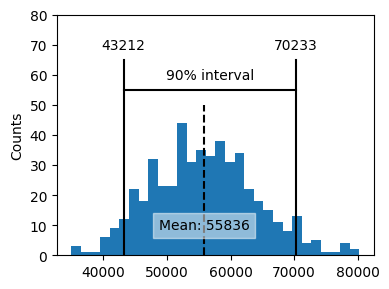

In [ ]:
print(loans_income.mean())
np.random.seed(seed=3)
# 표본을 n = 20개 비복원추출해서
sample20 = resample(loans_income, n_samples=20, replace=False)
# 평균을 보고
print(sample20.mean())
#20개를 뽑은 표본에서 부트스트랩을 500번 진행한것이다. (복원추출)
results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)
# 신뢰구간을 90%확률로 설정하고 그래프에 표시하고
confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [55, 55], color='black')
for x in confidence_interval:
    ax.plot([x, x], [0, 65], color='black')
    ax.text(x, 70, f'{x:.0f}',
            horizontalalignment='center', verticalalignment='center')
ax.text(sum(confidence_interval) / 2, 60, '90% interval',
        horizontalalignment='center', verticalalignment='center')
# 500번 복원추출을 한 (부트스트랩) 표본들의 평균을 보고 그래프를 그린다.
meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 10, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_ylabel('Counts')

plt.tight_layout()
plt.show()

## 그래프 해석

결국 우리가 보는 그래프는 모집단에서 20개의 표본을 비복원 추출해서 부트스트랩한 500개의 표본들의 분포를 그려놓은 것이다.
<br>
90%의 신뢰구간은 43212 ~ 70233이다.

## 2.6 정규분포
진짜 맨날 맨날보고 아마 3장에서 보는 모든 분석, 검정이 우리가 가지고 있는 데이터가 정규분포를 따른다고 가정하고 진행한다.
<br> 그만큼 중요한 분포다.  <br>
보통 Q-Q plot으로 보거나 검정이 있다.
<br> 이때 표준화를 하면 표준정규분포
N ~ (0,1) 을 따른다고 한다.
<br>=> 표준화를 하는 이유는 수학자가 계산해놓아서 따로 계산을 할 필요가 없어서라고 걸로 들었는데 정확히는 모르겠다.

### 2.6.1 표준정규분포와 QQ-polt

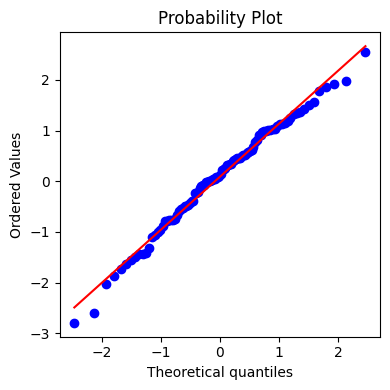

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))
# 정규분포로 100개를 뽑아서 샘플을 만들고 그래프를 그린다.
norm_sample = stats.norm.rvs(size=100)
stats.probplot(norm_sample, plot=ax)

plt.tight_layout()
plt.show()

보통 위처럼 나오거나 비슷해보여도 검정을 진행해야한다.
그래프가 정확할 수도 있지만, 정확하지 않을 수도 있다.

## 2.7 긴 꼬리 분포

아마 지금부터 다른 분포들을 살펴볼 것인데
당연하게도 현실에서는 정규분포를 찾아보기 어렵다. 허허 그래서 배운다.

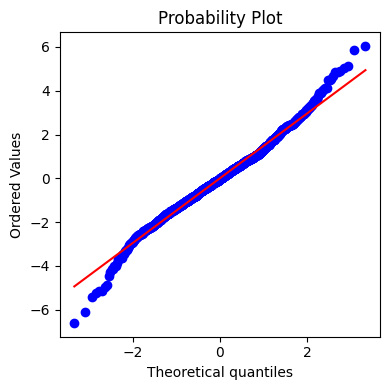

In [ ]:
sp500_px = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PS/data/sp500_data.csv.gz')

nflx = sp500_px.NFLX #pandas의 df에서 하나의 Series만 꺼내는 방법
nflx = np.diff(np.log(nflx[nflx>0]))

fig, ax = plt.subplots(figsize=(4, 4))
stats.probplot(nflx, plot=ax)

plt.tight_layout()
plt.show()

진짜 이것만 보고 알 수 없어요...

## 2.8 스튜던트의 t분포
이게 정규분포랑 비슷하긴한데, 약간 꼬리 쪽으로 퍼져있는 분포다.
그리고 n >= 30 일 때 보통 정규분포를 따른다고 가정하고 진행한다.

## 2.9 이항분포
모를 것 같은 사람이 없어서 pass
항상 기준은 30개의 표본이다
30개 이상이면 이것도 정규분포를 따른다고 할 수 있다.
고등학교 때 확률과 통계 문제를 잘 보면 다 n이 30이상이다.

In [ ]:
print(stats.binom.pmf(2, n=5, p=0.1)) #이항 확률 계산

0.07289999999999992


In [ ]:
print(stats.binom.cdf(2, n=5, p=0.1)) # 성공할 확률 계산

0.99144


## 2.10 카이 제곱 분포
독립성 검정